# MODELO DE REGRESSÃO LINEAR SIMPLES.

Resolução de alguns exercícios do Livro "Estatistica Básica - Morettin e Bussab" 6ª Edição (Capítulo 16).

Os modelos de Regressão Lineares são extremamente importantes, pois eles permitem modelar a relação linear entre duas ou mais variáveis aleatórias através de uma equação determinística.

Estes modelos podem ser descritos, apresentados pela equação abaixo:

y = $\beta_0$ + $\beta_1$ . x  + $\epsilon_i$

 $\beta_0$, $\beta_1$ e $\sigma^2$ são `"fixos"` e `desconhecidos`

 Com relação ao erro, assumimos que $\epsilon_i$~N(0,$\sigma^2)$ - isto é, tem média zero e variância sigma ao quadrado (tem uma distribuição normal, probabilística em torna da reta estimada).

*  $\beta_0$ representando o `intercepto`, ou o ponto no qual a reta "intercepta", cruza o eixo da ordenada ou "eixo y";

*   $\beta_1$ representa o `coeficiente angular`. Este coeficiente denota a taxa de variação de y em função de x, ou o quanto a variação de 1 unidade em x representa, implica na na variação de y.

*   erro: variáveis que não foram incluídas no modelo e podem explicar, predizer a variável y.  No exemplo abaixo, a algura do filho pode ser influenciado por exercícios físicos, alimentação, ...


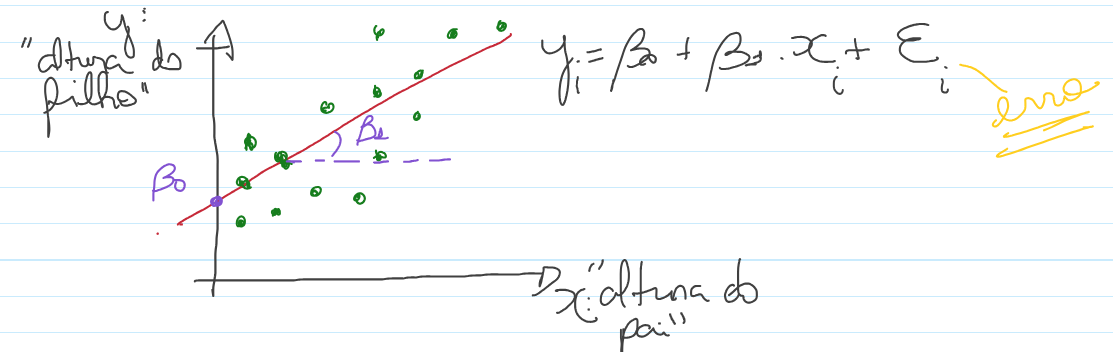

Suponha que não temos a equação estimada da reta.
### O objetivo é encontrar os melhores valores dos parametros que forneçam o mlehor ajuste da reta.


Como estimar os parâmetros $\beta_0$ e $\beta_1$ ?

Usando o método dos `Mínimos Quadrados`
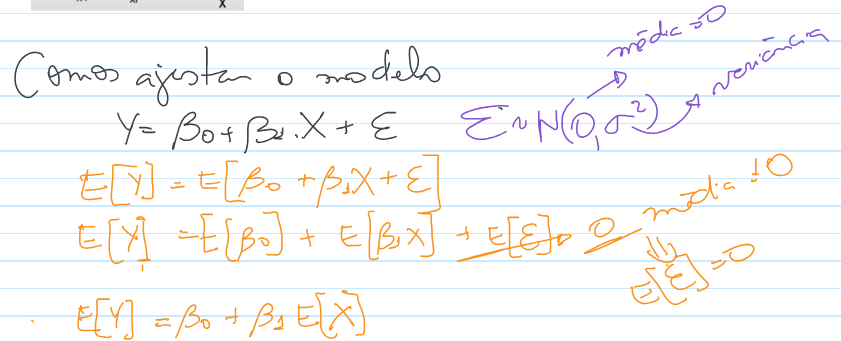

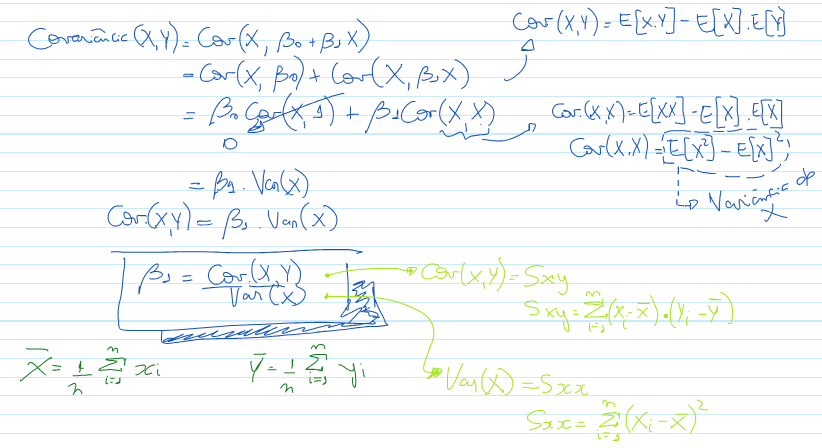




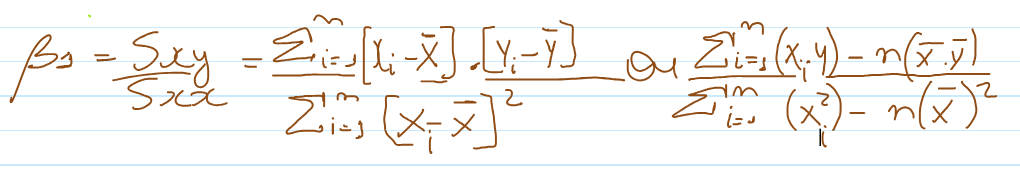
###-----------------------------------------------------------------###

$\beta_0$ = $\bar{y}$ - $\beta_1.\bar{x}$ ou $\beta_0$ = E[Y] - $\beta_1$.E[X]


###-----------------------------------------------------------------###
Cov(X,Y) = $\beta_1$.V(X)


Cov(X,Y) = $\frac{Cov(X,Y)}{Var(x)}$ ou $\frac{S_{xy}}{S_{xx}}$
  
$\beta_1$ = $\frac{\sum_{i=1}^{n}x_i.y_i - n.\bar{x}. \bar{y}}{\sum_{i=1}^{n}x_i^2 - n.\bar{x} ^ 2}$

###-----------------------------------------------------------------###


EXERCÍCIO

Um artigo no Jornal de Sons e Vibrações (Journal of Sound and Vibration,Vol. 151, 1991, pp. 383-394) descreveu um estudo investigando a relação
entre a exposição ao barulho e hipertensão. Os seguintes dados foram
reportados no estudo:

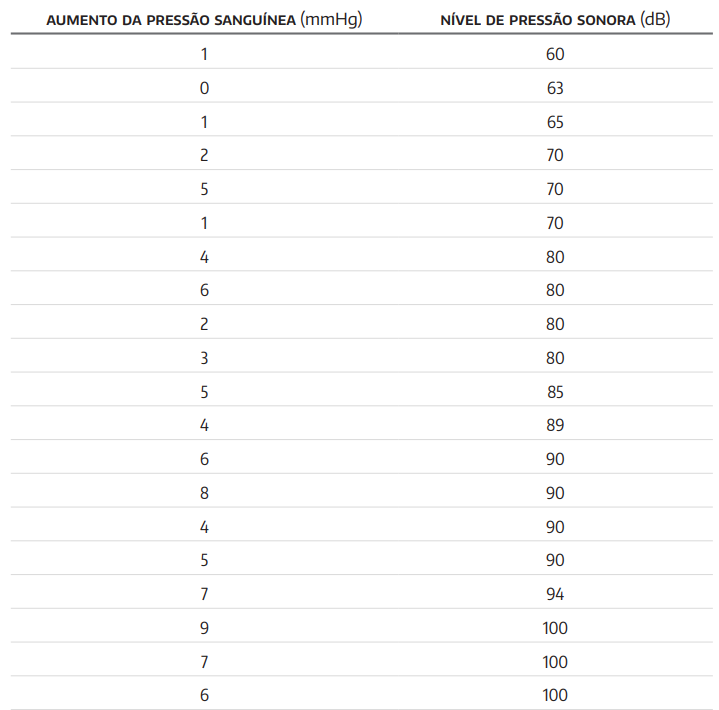



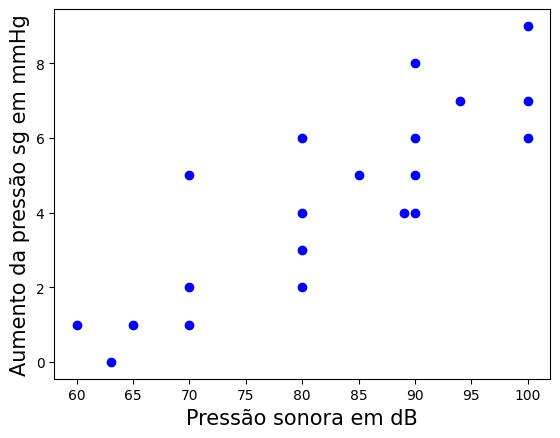

In [ ]:
# implementando em python

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#conjunto de dados da Tabela anterior, temos que:

# y = "aumento da pressão sanguínea em mmHg"
y = np.array([1,0,1,2,5,1,4,6,2,3,5,4,6,8,4,5,7,9,7,6])

# média de y:
m_y = np.mean(y)

# x = "nivel de pressão sonora em dB"
x = np.array([60,63,65,70,70,70,80,80,80,80,85,89,90,90,90,90,94,100,100,100])

# média de x
m_x = np.mean(x)

plt.plot(x,y,'bo')
plt.ylabel("Aumento da pressão sg em mmHg", fontsize = 15)
plt.xlabel("Pressão sonora em dB", fontsize = 15)
plt.show(True)



parece haver uma relação descrita através de uma reta de regressão linear, dada a observação do gráfico de dispersão anteriormente plotado.


Realizar:

* a. Ajuste o modelo de regressão linear simples usando o método de
mínimos quadrados e determine a equação da reta.

* b. Encontre o aumento médio previsto para a pressão sanguínea, associado com o nível de pressão sonora de 85 dB.

* c. Determine o coeficiente de correlação de Pearson.

In [ ]:
from statistics import variance
import math

def estimate_coef(X,Y):
    # número de observações/pontos
    n = np.size(x) # n é o tamanho do vetor x

    S_xy = 0 # contador
    S_xx = 0 # tb contador

    for i in range(0, len(x)):
        S_xy = S_xy + (x[i] - m_x)*(y[i] - m_y)
        S_xx = S_xx + (x[i] - m_x)**2

    # calculando os coeficientes de regressão:
    b_1 = S_xy/S_xx
    b_0 = m_y - (b_1*m_x)
    return(b_0, b_1)

# função para mostrar os dados e o ajuste linear do modelo:

def plot_regression_line(x,y,b):
    # mostrar os dados
    plt.scatter(x,y, color = "b", marker = "o", s = 50)

    # prediz os valores
    y_pred = b[0] + b[1] * x

    # mostra a reta de regressão
    plt.plot(x,y_pred, color = "r")

    plt.xlabel("nivel de pressão sonora em dB", fontsize = 12)
    plt.ylabel("aumento da pressão sanguínea em mmHg", fontsize = 12)
    plt.show(True)

Coeficientes estimados: 
b_0 = -9.813102119460506 
b_1 = 0.17148362235067444


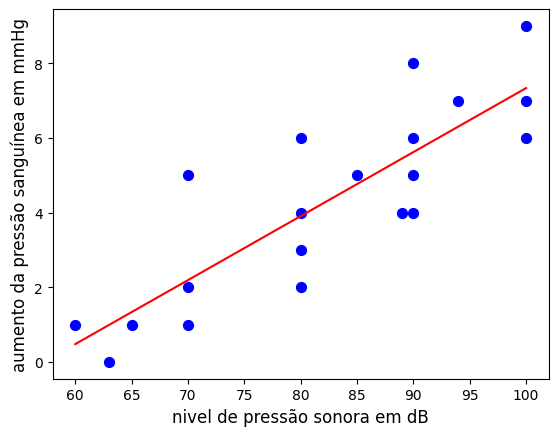

In [ ]:
# aplicando as fçs no conjunto de dados:

# estimando os coeficientes:
b = estimate_coef(x,y)
print("Coeficientes estimados: \nb_0 = {} \nb_1 = {}". format(b[0], b[1]))

# mostrar o ajuste linear
plot_regression_line(x,y,b)

In [ ]:
# Resposta item a (equação da reta):
x_observado = 85 # (valor observado usado no item b)
y_equacao_reta = -9.813102119460506 + 0.17148362235067444 * x_observado


In [ ]:
# Resposta do item b (Encontre o aumento médio previsto para a pressão sanguínea, associado com o nível de pressão sonora de 85 dB.)

y_equacao_reta = -9.813102119460506 + 0.17148362235067444 * x_observado

print("Quando o valor observado for 85 dB, o valor de y será ", y_equacao_reta)


Quando o valor observado for 85 dB, o valor de y será  4.7630057803468215


Uma medida importante é o coeficiente R2. Este coeficiente mede a proporção da variabilidae em Y que pode ser
explicada a partir de X.

$R^2$ = $\frac{(S_{xy})^2}{S_{xx}.S_{yy}}$=
 $\frac{\sum_{i=1}^{n}(x_i- \bar{x}).(y_i- \bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2.\sum_{i=1}^{n}(y_i-\bar{y})^2 }$



In [ ]:
# função para determinar R2

def R2(x,y):
    n = len(x)

    # médias de x e y:
    m_x, m_y = np.mean(x), np.mean(y)

    S_xy = 0
    S_xx = 0
    S_yy = 0

    for i in range(0, len(x)):
        S_xy = S_xy + (x[i] - m_x)*(y[i] - m_y)
        S_xx = S_xx + (x[i] - m_x)**2
        S_yy = S_yy + (y[i] - m_y)**2

    R2 = (S_xy**2)/(S_xx*S_yy)

    return R2

print('R2:', R2(x,y))


R2: 0.7127201759856533


In [ ]:
# o coeficiente de correlação de pearson é a raíz quadrada de R2
print('R2:', math.sqrt(R2(x,y)))

R2: 0.8442275617306351


quanto mais próximo de 1, significa que o modelo se ajusta bem à nossa reta

Uma vez encontrada a equação da Reta, o valor do R2, faz-se necessário testar o modelo pra saber se há uma relação entre as variáveis.
As hipóteses são:

* $H_0$: Não há relação entre as variáveis aleatórias X e Y.  $H_0:{\beta_1}$ = 0

* $H_1$: Há alguma relação entre X e Y. $H_0:{\beta_1}$ != 0

fazer o teste "t"



b0: -9.813102119460503
b1: [0.17148362]


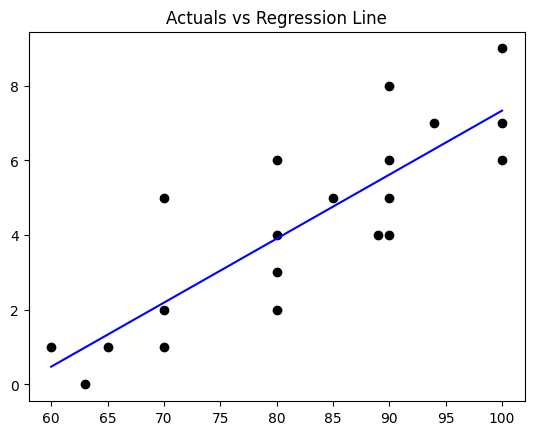

In [ ]:
# usando a biblioteca sciklearn:

from sklearn.linear_model import LinearRegression
x = x.reshape(-1,1)
reg = LinearRegression().fit(x,y)

y_predicted = reg.predict(x)
plt.plot(x,y,'o', color = 'black');
plt.plot(x,y_predicted, color = 'blue')
plt.title("Actuals vs Regression Line")

print("b0: {0}".format(reg.intercept_))
print("b1: {0}".format(reg.coef_))

note que os valores de Beta0 e Beta1 são exatamente iguais aos valores encontrados anteriormente.



Teste de hipóteses:


In [ ]:
!pip install statsmodels


In [ ]:
import statsmodels.api as sm
est = sm.OLS(y,x)
est2 = est.fit()
print(est2.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              102.0
Date:                Mon, 14 Aug 2023   Prob (F-statistic):                    4.47e-09
Time:                        14:38:38   Log-Likelihood:                         -41.930
No. Observations:                  20   AIC:                                      85.86
Df Residuals:                      19   BIC:                                      86.86
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

No summary anterior, o valor de p>|t| = 0, o que isto significa?


No contexto de um modelo de regressão linear, a expressão "P>|t|" refere-se ao valor p associado a um teste t realizado para avaliar a significância estatística dos coeficientes de regressão.

Especificamente, "P>|t|" é o valor p associado ao teste t para testar a hipótese nula de que o coeficiente de regressão correspondente é igual a zero (nenhum efeito).

Quando o valor p associado ao teste t é próximo de zero (geralmente considerado menor que 0,05), isso sugere que há evidências estatísticas suficientes para rejeitar a hipótese nula.

Isso significa que o coeficiente de regressão em questão é provavelmente diferente de zero e tem um efeito significativo na variável de resposta. Em outras palavras, o valor p baixo indica que é `IMPROVAVEL` que o resultado observado tenha ocorrido apenas por acaso.

Por outro lado, quando o valor p associado ao teste t é maior que 0,05 (ou qualquer nível de significância escolhido), isso sugere que não há evidências estatísticas suficientes para rejeitar a hipótese nula. Nesse caso, o coeficiente de regressão não é considerado estatisticamente significativo e pode ser interpretado como não tendo um efeito importante na variável de resposta.

Portanto, em resumo:

* P>|t| próximo de zero: O coeficiente de regressão é estatisticamente significativo e tem um efeito importante.

* P>|t| maior que um nível de significância (por exemplo, 0,05): O coeficiente de regressão não é estatisticamente significativo e não tem um efeito importante.


Lembrando que a interpretação dos resultados de um modelo de regressão deve ser feita com cuidado, considerando o contexto do problema, a teoria subjacente e outras análises estatísticas relevantes.
